
## Process of extraction, cleaning and preparation of dataset concerning the process data of heat treatment (annealing) processes

## 
Author: Tiago Moraes

### 1. Loading data and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, jaccard_score,classification_report, plot_roc_curve 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

print ("Libraries sucessfully loaded") 

Libraries sucessfully loaded


In [4]:

filename_exp = "https://raw.githubusercontent.com/tiagottmoraes/admission-test/main/datasets/data_experimentos.csv"

In [5]:

df = pd.read_csv(filename_exp)
df

,exp_id,ano,mes
0,2,2020,8
1,1368,2020,8
2,1130,2020,8
3,402,2020,8
4,407,2020,8
...,...,...,...
2419,1354,2020,7
2420,1610,2020,7
2421,2243,2020,7
2422,900,2020,7


In [6]:

filename_train = "https://raw.githubusercontent.com/tiagottmoraes/admission-test/main/datasets/train.csv"

In [7]:

other = pd.read_csv(filename_train)

### 2. Joining datasets


In [8]:
# Before proceeding with the joining of the dataframes, we checked the size of both bases to understand how the process should be done
other.shape

(2424, 40)

In [9]:
# junction
dados = df.join(other)
dados

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,...,p,shape,thick,width,len,oil,bore,packing,recozimento,experimento
0,2,2020,8,?,C,A,8,0,?,S,...,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim,exp_2
1,1368,2020,8,?,C,R,0,0,?,S,...,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim,exp_1368
2,1130,2020,8,?,C,A,0,60,T,?,...,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal,exp_1130
3,402,2020,8,?,C,A,0,60,T,?,...,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal,exp_402
4,407,2020,8,?,C,A,0,45,?,S,...,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano,exp_407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,1354,2020,7,?,C,R,0,0,?,S,...,?,SHEET,_1.6_,_1500.0_,_4170_,?,0,?,mediano,exp_1354
2420,1610,2020,7,TN,C,A,0,0,?,?,...,?,SHEET,_1.2_,_609.9_,_1_,?,0,?,mediano,exp_1610
2421,2243,2020,7,?,C,R,0,0,?,S,...,?,SHEET,_1.601_,_830.0_,_880_,?,0,?,mediano,exp_2243
2422,900,2020,7,?,C,A,0,85,T,?,...,?,COIL,_0.4_,_20.0_,_0_,?,0,?,mediano,exp_900


Observing the dataframe resulting from the join, we observed that the first column ('exp_id') and the last one ('experiment') present the same information, that is, the id of each experiment (duplicates). Thus, it was decided to remove the last column from this df.

In [10]:
del dados['experimento']

In [11]:
dados.head()

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,...,s,p,shape,thick,width,len,oil,bore,packing,recozimento
0,2,2020,8,?,C,A,8,0,?,S,...,?,?,COIL,_0.7_,_610.0_,_0_,?,0,?,ruim
1,1368,2020,8,?,C,R,0,0,?,S,...,?,?,SHEET,_0.7_,_1300.0_,_762_,?,0,?,ruim
2,1130,2020,8,?,C,A,0,60,T,?,...,?,?,COIL,_2.801_,_385.1_,_0_,?,0,?,ideal
3,402,2020,8,?,C,A,0,60,T,?,...,?,?,SHEET,_0.801_,_255.0_,_269_,?,0,?,ideal
4,407,2020,8,?,C,A,0,45,?,S,...,?,?,COIL,_1.6_,_610.0_,_0_,?,0,?,mediano


### 3. Data formatting and cleaning

In [12]:
# columns "thick", "width" and "len" are formatted incorrectly, with the '_' character before and after the values. The "replace" function was used to remove this character
dados["thick"] = dados["thick"].replace(to_replace ="_", value = '', regex = True)
dados["width"] = dados["width"].replace(to_replace ="_", value = '', regex = True)
dados["len"] = dados["len"].replace(to_replace ="_", value = '', regex = True)
dados

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,...,s,p,shape,thick,width,len,oil,bore,packing,recozimento
0,2,2020,8,?,C,A,8,0,?,S,...,?,?,COIL,0.7,610.0,0,?,0,?,ruim
1,1368,2020,8,?,C,R,0,0,?,S,...,?,?,SHEET,0.7,1300.0,762,?,0,?,ruim
2,1130,2020,8,?,C,A,0,60,T,?,...,?,?,COIL,2.801,385.1,0,?,0,?,ideal
3,402,2020,8,?,C,A,0,60,T,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,ideal
4,407,2020,8,?,C,A,0,45,?,S,...,?,?,COIL,1.6,610.0,0,?,0,?,mediano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,1354,2020,7,?,C,R,0,0,?,S,...,?,?,SHEET,1.6,1500.0,4170,?,0,?,mediano
2420,1610,2020,7,TN,C,A,0,0,?,?,...,?,?,SHEET,1.2,609.9,1,?,0,?,mediano
2421,2243,2020,7,?,C,R,0,0,?,S,...,?,?,SHEET,1.601,830.0,880,?,0,?,mediano
2422,900,2020,7,?,C,A,0,85,T,?,...,?,?,COIL,0.4,20.0,0,?,0,?,mediano


In [13]:
# Separating the data for the month of August only 
grouped = dados.groupby(dados.mes)
dados_ago = grouped.get_group(8)
dados_ago

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,...,s,p,shape,thick,width,len,oil,bore,packing,recozimento
0,2,2020,8,?,C,A,8,0,?,S,...,?,?,COIL,0.7,610.0,0,?,0,?,ruim
1,1368,2020,8,?,C,R,0,0,?,S,...,?,?,SHEET,0.7,1300.0,762,?,0,?,ruim
2,1130,2020,8,?,C,A,0,60,T,?,...,?,?,COIL,2.801,385.1,0,?,0,?,ideal
3,402,2020,8,?,C,A,0,60,T,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,ideal
4,407,2020,8,?,C,A,0,45,?,S,...,?,?,COIL,1.6,610.0,0,?,0,?,mediano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,145,2019,8,?,C,R,0,0,?,S,...,?,?,SHEET,1.6,1500.0,4170,?,0,?,ideal
1612,937,2019,8,TN,C,A,0,0,?,?,...,?,?,SHEET,1.2,609.9,1,?,0,?,ideal
1613,2228,2019,8,?,C,R,0,0,?,S,...,?,?,SHEET,1.601,830.0,880,?,0,?,ideal
1614,1263,2019,8,?,C,A,0,85,T,?,...,?,?,COIL,0.4,20.0,0,?,0,?,ideal


The new dataframe has 1616 rows in total

#### 3.1 Missing value analysis
Previously it was observed the presence of several incorrect characters (such as "?"). Thus, we proceeded with the analysis of missing or incorrect values

In [14]:
# changing all the "?" to NaN with numpy function
dados_ago.replace("?",np.nan, inplace=True)
dados_ago.head()

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,...,s,p,shape,thick,width,len,oil,bore,packing,recozimento
0,2,2020,8,NaN,C,A,8,0,NaN,S,...,NaN,NaN,COIL,0.7,610.0,0,NaN,0,NaN,ruim
1,1368,2020,8,NaN,C,R,0,0,NaN,S,...,NaN,NaN,SHEET,0.7,1300.0,762,NaN,0,NaN,ruim
2,1130,2020,8,NaN,C,A,0,60,T,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,ideal
3,402,2020,8,NaN,C,A,0,60,T,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,ideal
4,407,2020,8,NaN,C,A,0,45,NaN,S,...,NaN,NaN,COIL,1.6,610.0,0,NaN,0,NaN,mediano


In [15]:
# checking if there are cells with no value
missing_data=dados_ago.isnull()
missing_data.head()

,exp_id,ano,mes,family,product-type,steel,carbon,hardness,temper_rolling,condition,...,s,p,shape,thick,width,len,oil,bore,packing,recozimento
0,False,False,False,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,True,False
1,False,False,False,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,True,False
2,False,False,False,True,False,False,False,False,False,True,...,True,True,False,False,False,False,True,False,True,False
3,False,False,False,True,False,False,False,False,False,True,...,True,True,False,False,False,False,True,False,True,False
4,False,False,False,True,False,False,False,False,True,False,...,True,True,False,False,False,False,True,False,True,False


In [16]:
print(" \nTotal number of NaN items present in the columns of the DataFrame 'Data': \n\n", dados_ago.isnull().sum())


 
Total de itens NaN presentes nas colunas do DataFrame 'Dados': 

 exp_id                       0
ano                          0
mes                          0
family                    1382
product-type                 0
steel                      154
carbon                       0
hardness                     0
temper_rolling            1362
condition                  548
formability                582
strength                     0
non-ageing                1426
surface-finish            1600
surface-quality            430
enamelability             1590
bc                        1614
bf                        1380
bt                        1480
bw/me                     1234
bl                        1346
m                         1616
chrom                     1568
phos                      1604
cbond                     1482
marvi                     1616
exptl                     1612
ferro                     1562
corr                      1616
blue/bright/varn/clean    1606
lu

It can be seen that a large number of variables have all of their rows (i.e. 1616) as NaN. In addition, several other variables have more than 90% of their content as NaN. In both cases, it was decided to remove these variables, since they have little statistical value considering the sample space, and their removal would make the dataframe much leaner. 

#### 3.2 Setting the type of each DF variable

In [17]:
df_clean = dados_ago.drop(['family','temper_rolling','non-ageing','surface-finish','enamelability', 'bc', 'bw/me', 'bf', 'bt', 'bl', 'chrom', 'phos', 'cbond', 'exptl', 'ferro', 'blue/bright/varn/clean','lustre', 'oil', 'packing','m', 'marvi', 'corr' , 'jurofm' , 's' , 'p'], axis = 1)

In [18]:
# looking at the types of variables in each column
df_clean.dtypes

exp_id              int64
ano                 int64
mes                 int64
product-type       object
steel              object
carbon              int64
hardness            int64
condition          object
formability        object
strength            int64
surface-quality    object
shape              object
thick              object
width              object
len                object
bore                int64
recozimento        object
dtype: object

Notice that several variables are incorrectly coded, for example "thick" and "width" are defined as a string (object), but should be a float

In [19]:
df_clean[["formability", "thick", "width", "len"]] = df_clean[["formability", "thick", "width", "len"]].astype("float")
df_clean[['mes', 'ano', 'exp_id']] = df_clean[['mes','ano','exp_id']].astype('float')
df_clean.dtypes

exp_id             float64
ano                float64
mes                float64
product-type        object
steel               object
carbon               int64
hardness             int64
condition           object
formability        float64
strength             int64
surface-quality     object
shape               object
thick              float64
width              float64
len                float64
bore                 int64
recozimento         object
dtype: object

In [20]:
print(" \Total number of NaN items present in the columns of the 'Data' DataFrame: \n", df_clean.isnull().sum())

 
Total de itens NaN presentes nas colunas do DataFrame 'Dados' : 

 exp_id               0
ano                  0
mes                  0
product-type         0
steel              154
carbon               0
hardness             0
condition          548
formability        582
strength             0
surface-quality    430
shape                0
thick                0
width                0
len                  0
bore                 0
recozimento          0
dtype: int64


Some variables still have cells with NaN

#### 3.3 Filling in the blanks with average or most frequent values
For variables with fewer empty values, we chose to fill them in with the mean (in the case of continuous variables) or the mode (in the case of discrete variables)

In [21]:
# found the most frequent elements
print ("Most frequent element present in 'steel' column:", df_clean['steel'].value_counts().idxmax() )
print ("Most frequent element present in 'condition' column:", df_clean['condition'].value_counts().idxmax() )
print ("Most frequent element present in 'surface-quality' column:", df_clean['surface-quality'].value_counts().idxmax() )
print ("Most frequent element present in 'product-type' column:", df_clean['product-type'].value_counts().idxmax() )

Most frequent element present in 'steel' column: A
Most frequent element present in 'condition' column: S
Most frequent element present in 'surface-quality' column: E
Most frequent element present in 'product-type' column: C


In [22]:
# replacing the NaNs with the most frequent elemestments in each column
df_clean['steel'].replace(np.nan, "A", inplace=True)
df_clean['condition'].replace(np.nan, "S", inplace=True)
df_clean['surface-quality'].replace(np.nan, "E", inplace=True) 
df_clean['product-type'].replace(np.nan, "C", inplace=True) 

In [23]:
# calculating the average
avg_formab1 = df_clean['formability'].mean(axis=0)
avg_formab2 = df_clean['strength'].mean(axis=0)
avg_formab3 = df_clean['carbon'].mean(axis=0)
avg_formab4 = df_clean['bore'].mean(axis=0)
print("Average of formability:", avg_formab1 )
print("Average of strength:", avg_formab2 )
print("Average of carbon:", avg_formab3 )
print("Average of bore:", avg_formab4 )

Average of formability: 2.2147001934235977
Average of strength: 30.82920792079208
Average of carbon: 3.492574257425743
Average of bore: 28.465346534653467


In [24]:
# replacing the NaN with the average values
df_clean['formability'].replace(np.nan, avg_formab1, inplace=True)
df_clean['strength'].replace(np.nan, avg_formab2, inplace=True)
df_clean['carbon'].replace(np.nan, avg_formab3, inplace=True)
df_clean['bore'].replace(np.nan, avg_formab4, inplace=True)

In [25]:
print(" \nTotal NaN items present in the columns of the DataFrame 'Data : \n\n", df_clean.isnull().sum())

 
Total de itens NaN presentes nas colunas do DataFrame 'Dados' : 

 exp_id             0
ano                0
mes                0
product-type       0
steel              0
carbon             0
hardness           0
condition          0
formability        0
strength           0
surface-quality    0
shape              0
thick              0
width              0
len                0
bore               0
recozimento        0
dtype: int64


There are no more empty cell columns (NaN) in this dataframe

In [26]:
df_clean

,exp_id,ano,mes,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,recozimento
0,2.0,2020.0,8.0,C,A,8,0,S,2.2147,0,G,COIL,0.700,610.0,0.0,0,ruim
1,1368.0,2020.0,8.0,C,R,0,0,S,2.0000,0,E,SHEET,0.700,1300.0,762.0,0,ruim
2,1130.0,2020.0,8.0,C,A,0,60,S,2.2147,0,G,COIL,2.801,385.1,0.0,0,ideal
3,402.0,2020.0,8.0,C,A,0,60,S,2.2147,0,G,SHEET,0.801,255.0,269.0,0,ideal
4,407.0,2020.0,8.0,C,A,0,45,S,2.2147,0,D,COIL,1.600,610.0,0.0,0,mediano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,145.0,2019.0,8.0,C,R,0,0,S,2.0000,0,E,SHEET,1.600,1500.0,4170.0,0,ideal
1612,937.0,2019.0,8.0,C,A,0,0,S,3.0000,0,E,SHEET,1.200,609.9,1.0,0,ideal
1613,2228.0,2019.0,8.0,C,R,0,0,S,3.0000,0,E,SHEET,1.601,830.0,880.0,0,ideal
1614,1263.0,2019.0,8.0,C,A,0,85,S,2.2147,0,G,COIL,0.400,20.0,0.0,0,ideal


### 4. Saving and exporting the pre-processed file

In [1]:
df_clean.to_csv('data_experimentos_CLEAN.csv')

NameError: name 'df_clean' is not defined

In [2]:
filename_exp = "https://raw.githubusercontent.com/tiagottmoraes/admission-test/main/datasets/data_experimentos_CLEAN.csv"

### 5. Exploratory Data Analysis

In [28]:
df = pd.read_csv(filename_exp)

In [29]:
df.dtypes

Unnamed: 0           int64
exp_id             float64
ano                float64
mes                float64
product-type        object
steel               object
carbon               int64
hardness             int64
condition           object
formability        float64
strength             int64
surface-quality     object
shape               object
thick              float64
width              float64
len                float64
bore                 int64
recozimento         object
dtype: object

In [30]:
df=df.drop(['Unnamed: 0'], axis = 1)

###  One-hot encoding of categorical values

In [31]:
df_dummy = pd.get_dummies(df['recozimento'])

In [32]:
df2=df.join(df_dummy)
df2

,exp_id,ano,mes,product-type,steel,carbon,hardness,condition,formability,strength,surface-quality,shape,thick,width,len,bore,recozimento,ideal,mediano,ruim
0,2.0,2020.0,8.0,C,A,8,0,S,2.2147,0,G,COIL,0.700,610.0,0.0,0,ruim,0,0,1
1,1368.0,2020.0,8.0,C,R,0,0,S,2.0000,0,E,SHEET,0.700,1300.0,762.0,0,ruim,0,0,1
2,1130.0,2020.0,8.0,C,A,0,60,S,2.2147,0,G,COIL,2.801,385.1,0.0,0,ideal,1,0,0
3,402.0,2020.0,8.0,C,A,0,60,S,2.2147,0,G,SHEET,0.801,255.0,269.0,0,ideal,1,0,0
4,407.0,2020.0,8.0,C,A,0,45,S,2.2147,0,D,COIL,1.600,610.0,0.0,0,mediano,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,145.0,2019.0,8.0,C,R,0,0,S,2.0000,0,E,SHEET,1.600,1500.0,4170.0,0,ideal,1,0,0
1612,937.0,2019.0,8.0,C,A,0,0,S,3.0000,0,E,SHEET,1.200,609.9,1.0,0,ideal,1,0,0
1613,2228.0,2019.0,8.0,C,R,0,0,S,3.0000,0,E,SHEET,1.601,830.0,880.0,0,ideal,1,0,0
1614,1263.0,2019.0,8.0,C,A,0,85,S,2.2147,0,G,COIL,0.400,20.0,0.0,0,ideal,1,0,0


In [33]:
df2.drop(['exp_id', 'ano','mes','product-type', 'steel', 'carbon', 'condition', 'surface-quality', 'shape', 'recozimento'], axis =1, inplace= True)
df2

,hardness,formability,strength,thick,width,len,bore,ideal,mediano,ruim
0,0,2.2147,0,0.700,610.0,0.0,0,0,0,1
1,0,2.0000,0,0.700,1300.0,762.0,0,0,0,1
2,60,2.2147,0,2.801,385.1,0.0,0,1,0,0
3,60,2.2147,0,0.801,255.0,269.0,0,1,0,0
4,45,2.2147,0,1.600,610.0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1611,0,2.0000,0,1.600,1500.0,4170.0,0,1,0,0
1612,0,3.0000,0,1.200,609.9,1.0,0,1,0,0
1613,0,3.0000,0,1.601,830.0,880.0,0,1,0,0
1614,85,2.2147,0,0.400,20.0,0.0,0,1,0,0


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hardness     1616 non-null   int64  
 1   formability  1616 non-null   float64
 2   strength     1616 non-null   int64  
 3   thick        1616 non-null   float64
 4   width        1616 non-null   float64
 5   len          1616 non-null   float64
 6   bore         1616 non-null   int64  
 7   ideal        1616 non-null   uint8  
 8   mediano      1616 non-null   uint8  
 9   ruim         1616 non-null   uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 93.2 KB


In [35]:
df.describe(include=['object'])

,product-type,steel,condition,surface-quality,shape,recozimento
count,1616,1616,1616,1616,1616,1616
unique,1,7,2,4,2,3
top,C,A,S,E,SHEET,ideal
freq,1616,964,1544,980,862,980


In [36]:
df2.corr()

,hardness,formability,strength,thick,width,len,bore,ideal,mediano,ruim
hardness,1.000000e+00,6.304762e-17,-1.305990e-01,0.023384,-0.032118,-0.117843,0.169656,0.163604,0.015552,-0.189385
formability,6.304762e-17,1.000000e+00,7.087430e-17,0.007200,-0.045600,-0.028614,-0.014421,0.059518,0.012145,-0.073516
strength,-1.305990e-01,7.087430e-17,1.000000e+00,0.075101,0.055514,-0.031351,-0.033996,0.164341,-0.019939,-0.164918
thick,2.338412e-02,7.199723e-03,7.510099e-02,1.000000,0.015904,-0.083123,0.394505,-0.000935,0.114074,-0.080200
width,-3.211824e-02,-4.559968e-02,5.551421e-02,0.015904,1.000000,0.107076,0.023235,-0.037007,0.033534,0.016459
len,-1.178427e-01,-2.861357e-02,-3.135058e-02,-0.083123,0.107076,1.000000,-0.151259,-0.057977,-0.071280,0.113939
bore,1.696564e-01,-1.442104e-02,-3.399618e-02,0.394505,0.023235,-0.151259,1.000000,-0.049573,0.274425,-0.141356
ideal,1.636044e-01,5.951813e-02,1.643408e-01,-0.000935,-0.037007,-0.057977,-0.049573,1.000000,-0.447685,-0.771155
mediano,1.555189e-02,1.214471e-02,-1.993948e-02,0.114074,0.033534,-0.071280,0.274425,-0.447685,1.000000,-0.224050
ruim,-1.893849e-01,-7.351553e-02,-1.649182e-01,-0.080200,0.016459,0.113939,-0.141356,-0.771155,-0.224050,1.000000


### Correlation test

In [37]:
df2.corr()['ideal'].sort_values()

ruim          -0.771155
mediano       -0.447685
len           -0.057977
bore          -0.049573
width         -0.037007
thick         -0.000935
formability    0.059518
hardness       0.163604
strength       0.164341
ideal          1.000000
Name: ideal, dtype: float64

Pearson, P-Valor =  (0.16360439715143996, 3.681679501598558e-11)


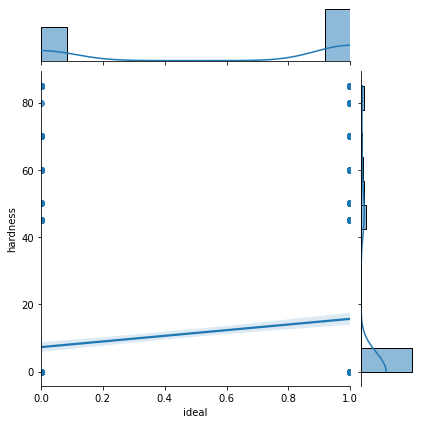

In [38]:
# plotting the linearized relationship between the "ideal" and "hardness" parameters 
sns.jointplot(data=df2, x="ideal", y="hardness", kind="reg")
stats.pearsonr(df2['ideal'],df2['hardness'])
print ('Pearson, P-Valor = ', stats.pearsonr(df2['ideal'],df2['hardness']))

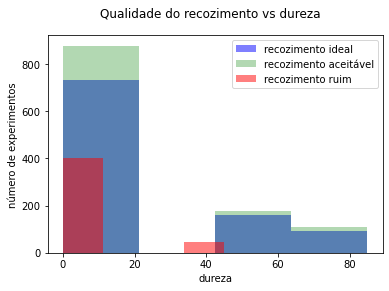

In [39]:
# histogram with the distribution of the experiments with the hardness level, plotted with the obtained annealing quality results

fig, ax = plt.subplots()

ax.hist(df2[df2["ideal"]==1]["hardness"], bins=4, alpha=0.5, color="blue", label="ideal annealing")
ax.hist(df2[df2["ruim"]==0]["hardness"], bins=4, alpha=0.3, color="green", label="mixed annealing")
ax.hist(df2[df2["ruim"]==1]["hardness"], bins=4, alpha=0.5, color="red", label="bad annealing")

ax.set_xlabel("hardness")
ax.set_ylabel("num of experiments")

fig.suptitle("Annealing vs Hardness")

ax.legend()

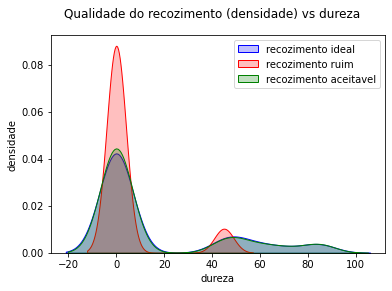

In [40]:
# occurrence density estimation
fig, ax = plt.subplots()

sns.kdeplot(df2[df2["ideal"]==1]["hardness"], shade=True, color="blue", label="ideal annealing", ax=ax)
sns.kdeplot(df2[df2["ruim"]==1]["hardness"], shade=True, color="red", label="mixed annealing", ax=ax)
sns.kdeplot(df2[df2["ruim"]==0]["hardness"], shade=True, color="green", label="bad annealing", ax=ax)

ax.set_xlabel("hardness")
ax.set_ylabel("density")

fig.suptitle("density vs dureza")

ax.legend()

<AxesSubplot:>

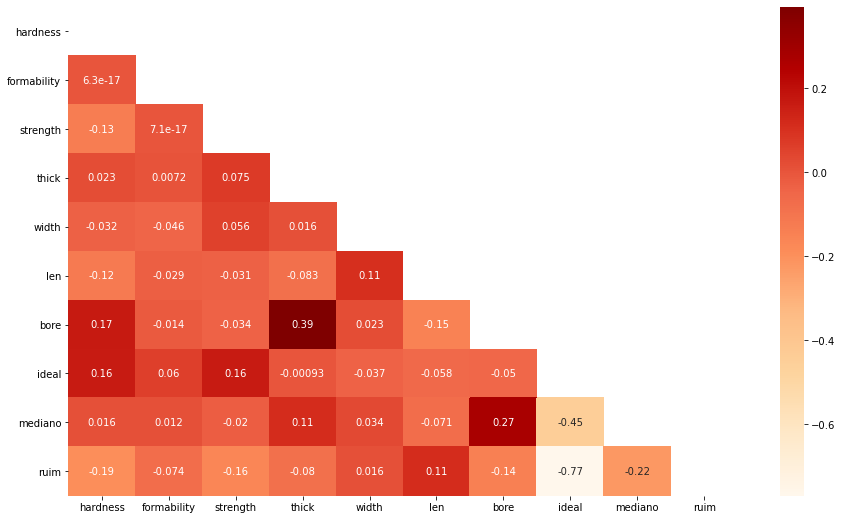

In [42]:
# Heatmap for correlations
plt.figure(figsize = (15,9))
mask=np.triu(df2.corr())
sns.heatmap(df2.corr(), mask=mask, annot=True, cmap='OrRd')

In [43]:
df2=df2.drop(['mediano', 'ruim'], axis=1)

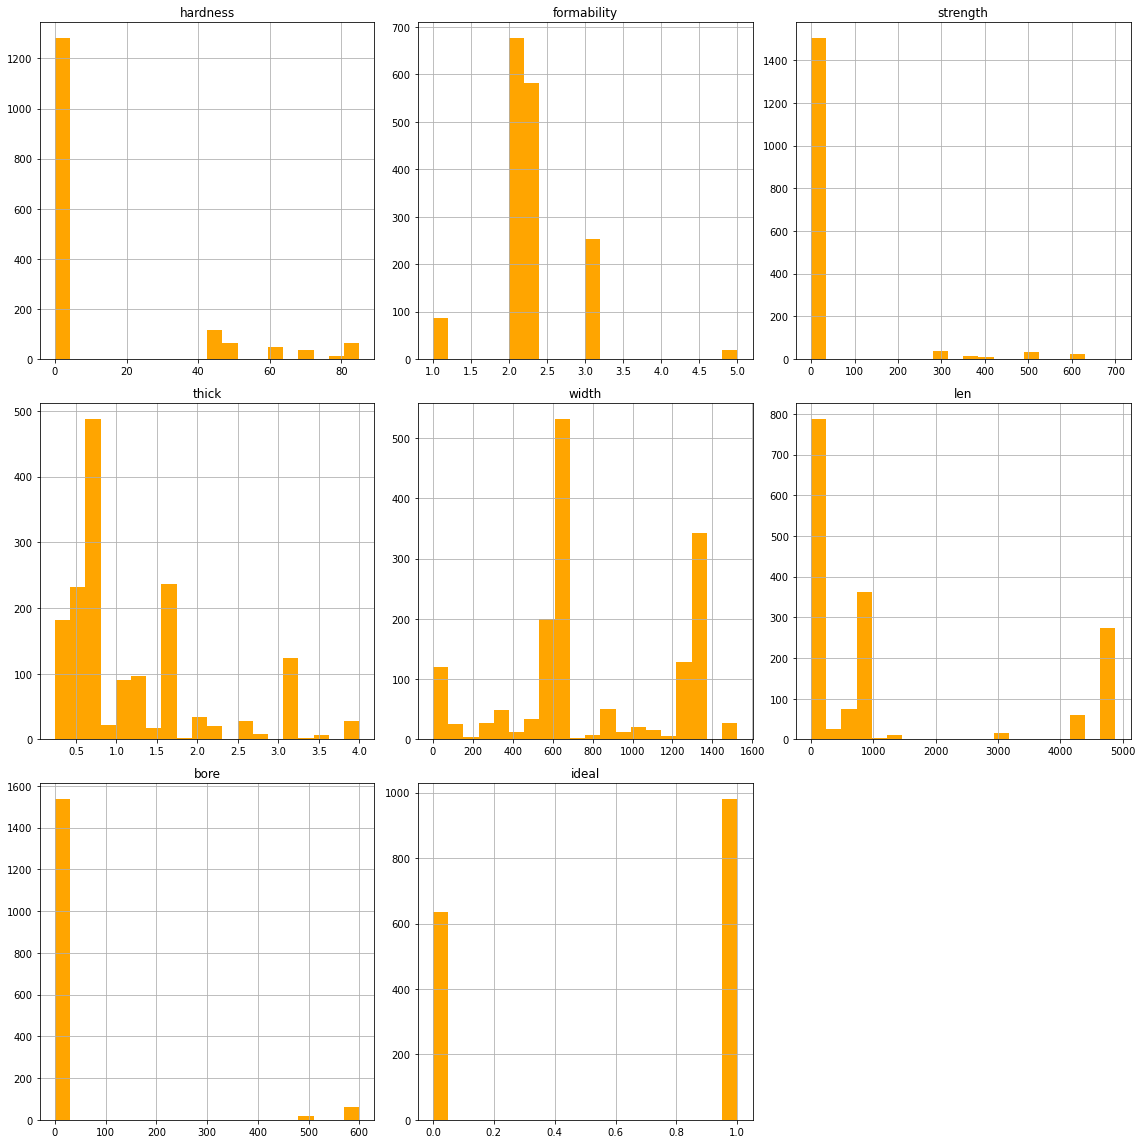

In [44]:
df2.hist(bins=20, color='orange', figsize=(16,16))
plt.tight_layout()

In [45]:
X=df2.iloc[:,:-1].values
y=df2['ideal']

X.shape, y.shape

((1616, 7), (1616,))

### 6. Model building

In [46]:
scale=StandardScaler()
X=scale.fit_transform(X)
X

array([[-0.49195814,  0.        , -0.2654677 , ..., -0.42534124,
        -0.66475959, -0.22753994],
       [-0.49195814, -0.40491538, -0.2654677 , ...,  1.28246382,
        -0.25370429, -0.22753994],
       [ 1.8966378 ,  0.        , -0.2654677 , ..., -0.98198668,
        -0.66475959, -0.22753994],
       ...,
       [-0.49195814,  1.48104184, -0.2654677 , ...,  0.11917632,
        -0.19005006, -0.22753994],
       [ 2.89188611,  0.        , -0.2654677 , ..., -1.88563832,
        -0.66475959, -0.22753994],
       [ 2.89188611,  0.        , -0.2654677 , ..., -0.42534124,
        -0.66475959,  3.76924856]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [48]:
X_train, y_train=shuffle(X_train, y_train)

In [49]:
X_train.shape, y_test.shape

((1292, 7), (324,))

In [58]:
pipeline = make_pipeline(RobustScaler())

Random_forest = make_pipeline(pipeline, RandomForestClassifier(random_state=0, min_samples_leaf = 2, n_estimators = 1000))
Decision_tree = make_pipeline(pipeline, DecisionTreeClassifier(random_state=0))
Logistic_regression = make_pipeline(pipeline, LogisticRegression(random_state=0))
svc = make_pipeline(pipeline, SVC(random_state=0))
gradientboost = make_pipeline(pipeline, GradientBoostingClassifier(random_state=0))

In [59]:
param_dist = {
    'RandomForest':Random_forest,
    'DecisionTree':Decision_tree,
    'LogisticRegression':Logistic_regression,
    'svc':svc,
    'GD':gradientboost
}

In [60]:
def MODEL(model):
 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('The accuracy score of the model is: {}%'.format(accuracy_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

### Different models evaluation

In [61]:
def model_evaluation(parameter_dictionary):
    
    for name, model in parameter_dictionary.items():
        print(name)
        evaluation = MODEL(model)
    return evaluation
evaluation = model_evaluation(param_dist)

RandomForest
The accuracy score of the model is: 0.38271604938271603%
[[ 12 109]
 [ 91 112]]
              precision    recall  f1-score   support

           0       0.12      0.10      0.11       121
           1       0.51      0.55      0.53       203

    accuracy                           0.38       324
   macro avg       0.31      0.33      0.32       324
weighted avg       0.36      0.38      0.37       324

DecisionTree
The accuracy score of the model is: 0.3549382716049383%
[[ 22  99]
 [110  93]]
              precision    recall  f1-score   support

           0       0.17      0.18      0.17       121
           1       0.48      0.46      0.47       203

    accuracy                           0.35       324
   macro avg       0.33      0.32      0.32       324
weighted avg       0.37      0.35      0.36       324

LogisticRegression
The accuracy score of the model is: 0.6203703703703703%
[[ 26  95]
 [ 28 175]]
              precision    recall  f1-score   support

        

In [122]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

model.compile(
    optimizer=SGD(),
    loss="binary_crossentropy",
    metrics=['accuracy']
    )

M= model.fit(X_train, y_train, batch_size=12, epochs = 100, verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
108/108 [==============================] - 1s 8ms/step - loss: 0.7015 - accuracy: 0.5018 - val_loss: 0.6723 - val_accuracy: 0.6142
Epoch 2/100
108/108 [==============================] - 0s 4ms/step - loss: 0.6725 - accuracy: 0.6029 - val_loss: 0.6584 - val_accuracy: 0.6265
Epoch 3/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5889 - val_loss: 0.6507 - val_accuracy: 0.6265
Epoch 4/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6220 - val_loss: 0.6464 - val_accuracy: 0.6265
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.6146 - val_loss: 0.6428 - val_accuracy: 0.6265
Epoch 6/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6472 - accuracy: 0.6222 - val_loss: 0.6398 - val_accuracy: 0.6265
Epoch 7/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.6031 - val_loss: 0.6370 - val_accuracy: 0.6265

Epoch 58/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6449 - accuracy: 0.5963 - val_loss: 0.6027 - val_accuracy: 0.6235
Epoch 59/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.6260 - val_loss: 0.6022 - val_accuracy: 0.6173
Epoch 60/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.5818 - val_loss: 0.6018 - val_accuracy: 0.6204
Epoch 61/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6374 - accuracy: 0.6159 - val_loss: 0.6013 - val_accuracy: 0.6235
Epoch 62/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.6026 - val_loss: 0.6011 - val_accuracy: 0.6235
Epoch 63/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.5742 - val_loss: 0.6016 - val_accuracy: 0.6235
Epoch 64/100
108/108 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.5847 - val_loss: 0.6015 - val_accuracy:

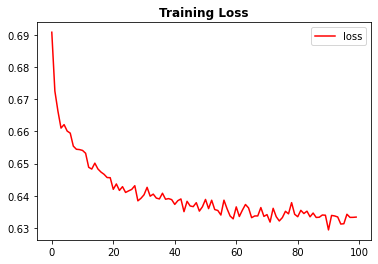

In [123]:
plt.plot(M.history['loss'], label='loss',color='red')
plt.title(label='Training Loss', weight ='bold')
plt.legend();

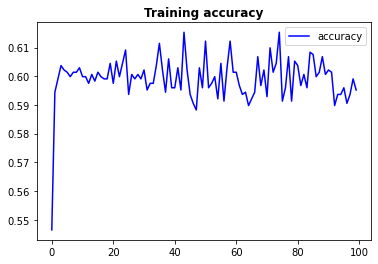

In [124]:
plt.plot(M.history['accuracy'], label='accuracy',color='blue')
plt.title(label='Training accuracy', weight ='bold')
plt.legend();

In [125]:
dnn_pred = model.predict(X_test)
dnn_pred = (dnn_pred > 0.5)

print(classification_report(y_test, dnn_pred))

              precision    recall  f1-score   support

           0       0.45      0.08      0.14       121
           1       0.63      0.94      0.76       203

    accuracy                           0.62       324
   macro avg       0.54      0.51      0.45       324
weighted avg       0.57      0.62      0.53       324



In [126]:
predictions=model.predict(X_test, steps=1)
accuracy_score(y_test, dnn_pred)

0.6203703703703703

In [127]:
accuracy_score_model = {
    'RandomForest':38.58,
    'DecisionTree':35.49,
    'LogisticRegression':62.03,
    'SVC':61.11,
    'GD':51.23,
    'DNN':62.02
}

### Models accuracy scores

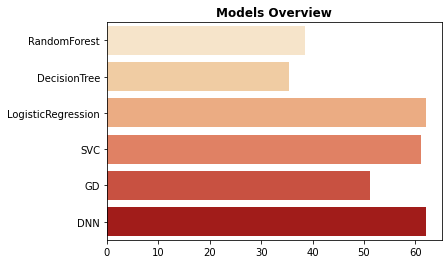

In [128]:
def models_overview(accuracy_score_model):
    
    model_accuracy = list(accuracy_score_model.values())
    model_name = list(accuracy_score_model.keys())

    g = sns.barplot(x = model_accuracy, y = model_name,palette='OrRd')
    plt.title('Models Overview', weight='bold');
    return g
    
over_view = models_overview(accuracy_score_model)